# 我們提供給使用者兩種功能
### 1.根據不同需求，讓使用者選擇要何種價位區間的股票
    ex: 因為也不是所有人都買得起大立光那種高價的股票
    所以會提供使用者想看的股票價位落在 "0~5","6~10","11~15","16~20","21~50","51~100","101~200","201~300","301以上"讓使用者選擇
### 2.推薦 會漲的所有股票 以及 漲幅前五 的股票給使用者

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os

# 前置作業為進行股票的爬蟲並存在data.db
所以這邊是將data.bd資料讀出

In [2]:
conn = sqlite3.connect(os.path.join('data','data.db'))

# 讀資料進來 
因為資料有 1689044 rows × 15 columns 所以跑比較慢  要等一會兒

In [3]:
df = pd.read_sql('select * from price',conn)
df

,stock_id,date,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,0015,2012-01-02 00:00:00,1000,1,6720,6.72,6.72,6.72,6.72,0.03,6.66,2.0,6.70,6.0,0.00
1,0015,2012-01-03 00:00:00,3000,3,20210,6.75,6.75,6.71,6.71,0.01,6.71,1.0,6.75,16.0,0.00
2,0015,2012-01-04 00:00:00,11000,3,74250,6.75,6.75,6.75,6.75,0.04,6.75,9.0,6.79,2.0,0.00
3,0015,2012-01-05 00:00:00,7000,2,47110,6.73,6.73,6.73,6.73,0.02,6.74,12.0,6.79,3.0,0.00
4,0015,2012-01-06 00:00:00,39000,11,262450,6.73,6.73,6.71,6.73,0.00,6.73,20.0,6.81,3.0,0.00
5,0015,2012-01-09 00:00:00,6000,2,40380,6.73,6.73,6.73,6.73,0.00,6.73,20.0,6.78,1.0,0.00
6,0015,2012-01-12 00:00:00,34000,34,231880,6.82,6.82,6.82,6.82,0.00,6.82,10.0,6.86,10.0,0.00
7,0015,2012-01-13 00:00:00,11000,11,75150,6.85,6.85,6.83,6.83,0.01,6.77,5.0,6.85,1.0,0.00
8,0015,2012-01-16 00:00:00,40000,29,273400,6.84,6.84,6.83,6.83,0.00,6.75,2.0,6.83,3.0,0.00
9,0015,2012-01-17 00:00:00,11000,11,75190,6.83,6.89,6.83,6.89,0.06,6.84,17.0,6.88,11.0,0.00


# 找2012-01-02~2019-05-10都還活著的股票做分析
因為怕新股票不穩定
2012-01-02還在,但2019-05-10已經消失的股票也不用分析

In [4]:
still_life_stock_index = []
still_life_stock_index.append(np.where(df['date'] == '2019-05-10 00:00:00'))
still_life_stock_id = df.loc[still_life_stock_index[0][0],'stock_id']

In [5]:
life2012_stock_index = []
life2012_stock_index.append(np.where(df['date'] == '2012-01-02 00:00:00'))
life2012_stock_id =  df.loc[life2012_stock_index[0][0],'stock_id']

In [6]:
ALL_stock_id=list(set(still_life_stock_id) & set(life2012_stock_id))
print('印出前幾個股票id來看看',ALL_stock_id[0:5])
print('所以要分析的股票有',len(ALL_stock_id),'個')

印出前幾個股票id來看看 ['1229', '1304', '9907', '6277', '3296']
所以要分析的股票有 773 個


# 找到201612月最後一筆的index
所以從下面程式碼可以看到 先將data欄位做排序 就會從2012/01/02排到2019/05/10

training data 是2012~2016年底 共5年

texting data 是2017~2019/5/10


然後找2016年12月最後一天，因為31日是假日沒有開盤，所以最後一筆就是2016/12/30以前的所有資料了 把它的位置記起來


training data(2012/01/02~2016/12/30): df第0個位置到第1100709

texting data(2017/01/02~2019/05/10): df第1100710個位置到第1689043


In [7]:
df_sort_by_date = df.sort_values(by='date', ascending=True)
df_sort_by_date = df_sort_by_date.reset_index(drop=True)#重置索引reset_index來獲取默認索引0,1,2，...，n-1（drop=True要刪除現有索引)
train_end_index = np.where(df_sort_by_date['date'] == '2016-12-30 00:00:00')[0][-1]
train_end_index

1100709

# 製作training data 與 testing data 
這是全部的訓練集，等等會讓使用者看要哪個stock，預測時會用使用者輸入的stock的train來做
 
training data(2012/01/02~2016/12/30): df第0個位置到第1100709

testing data(2017/01/02~2019/05/10): df第1100710個位置到第1689043

In [8]:
ALL_train = df_sort_by_date.iloc[:train_end_index+1,:] # 這是全部的訓練集，等等會讓使用者看要哪個stock，預測時會用使用者輸入的stock的train來做
ALL_test = df_sort_by_date.iloc[train_end_index+1:len(df),:]
print(ALL_train.shape)
print(ALL_test.shape)

(1100710, 15)
(588334, 15)


In [9]:
still_life_stock_index = []
still_life_stock_index.append(np.where(df['date'] == '2019-05-10 00:00:00'))
still_life_stock_id_price = df.loc[still_life_stock_index[0][0],['stock_id','開盤價']]
still_life_stock_id_price = still_life_stock_id_price.reset_index(drop=True)
still_life_stock_id_price_is_ALL_stock_id = []
for i in range(0,len(ALL_stock_id)):
    still_life_stock_id_price_is_ALL_stock_id.append(np.where(still_life_stock_id_price['stock_id'] == ALL_stock_id[i])[0][0])
    
still_life_stock_id_price = still_life_stock_id_price.loc[still_life_stock_id_price_is_ALL_stock_id,['stock_id','開盤價']]
# sort_still_life_stock_id_price= still_life_stock_id_price.sort_values(by = '開盤價',ascending=True)
# bins = [0,5,10,15,20,25,30,35,40,45,50,100,150,200,250,300,350,max(sort_still_life_stock_id_price['開盤價'])]# price = []
# sort_still_life_stock_id_price_cut = pd.cut(sort_still_life_stock_id_price['開盤價'],bins)
# pd.value_counts(sort_still_life_stock_id_price_cut)

# 可以讓使用者看要哪一個價位區間的股票 

ex:
<img src="picture_8.png"  style="width: 1000px;"/>

In [10]:
def f(x):
    print('你想看的股票價位落在:')
    if (x==1):
        print('0~5')
    elif (x==2):
        print('6~10')
    elif (x==3):
        print('11~15')
    elif (x==4):
        print('16~20')
    elif (x==5):
        print('21~50')
    elif (x==6):
        print('51~100')
    elif (x==7):
        print('101~200')
    elif (x==8):
        print('201~300')
    elif (x==9):
        print('301以上')
    return x

y0 = interact(f, x={"0~5":1,"6~10":2,"11~15":3,"16~20":4,"21~50":5,"51~100":6,"101~200":7,"201~300":8,"301以上":9})


interactive(children=(Dropdown(description='x', options={'11~15': 3, '201~300': 8, '16~20': 4, '21~50': 5, '30…

In [11]:
choose_user_input_y0 = int(y0.widget.result)
if choose_user_input_y0 == 1:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=5]
elif choose_user_input_y0 == 2:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>5]
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=10]
elif choose_user_input_y0 == 3:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>10]
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=15]
elif choose_user_input_y0 == 4:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>15]
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=20]
elif choose_user_input_y0 == 5:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>20]
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=50]
elif choose_user_input_y0 == 6:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>51]
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=100]
elif choose_user_input_y0 == 7:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>100]
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=200]
elif choose_user_input_y0 == 8:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>200]
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']<=300]
elif choose_user_input_y0 == 9:
    range_of_choose_df = still_life_stock_id_price[still_life_stock_id_price['開盤價']>300]

print('這個區間有',len(range_of_choose_df),'張股票')
ALL_stock_id = range_of_choose_df['stock_id']
ALL_stock_id = ALL_stock_id.reset_index(drop=True)
print(ALL_stock_id)

這個區間有 33 張股票
0       2364
1       3051
2     911868
3       3686
4       2443
5       2007
6       9157
7       1449
8       1471
9       9105
10      5484
11      6131
12      4934
13      9928
14    910482
15      2380
16    912398
17      6225
18      3043
19      3383
20      9103
21      9188
22      9110
23    912000
24      1616
25    911616
26      6152
27    911622
28      2321
29      8101
30      2025
31      2475
32      6289
Name: stock_id, dtype: object


# 讓使用者輸入想看的stock id

使用者輸入想看的股票代碼 ex:3008

有下拉式選單讓使用者選其股票的'開盤價'最高價''最低價''收盤價' 的未來趨勢

ex:
<img src="picture7.png"  style="width: 1000px;"/>

In [12]:
def f(x):
    print('你選擇的是:')
    if (x==1):
        print('開盤價')
    elif (x==2):
        print('最高價')
    elif (x==3):
        print('最低價')
    elif (x==4):
        print('收盤價')
    return x

y = interact(f, x={"開盤價":1,"最高價":2,"最低價":3,"收盤價":4})


interactive(children=(Dropdown(description='x', options={'最低價': 3, '收盤價': 4, '開盤價': 1, '最高價': 2}, value=3), Ou…

# 用來看每一個股票id的成長 並回傳60天前後股票漲跌差

In [16]:
def seperate_to_analyis_stock(stock_id):
    # 製作使用者想要看的stock的training data
    choose_user_input = int(y.widget.result)

    stock_id_index = np.where(ALL_train['stock_id'] == stock_id)
    dataset_train = ALL_train.iloc[stock_id_index[0],[0,4+choose_user_input]]
    training_set = ALL_train.iloc[stock_id_index[0],[4+choose_user_input]] # 讀取訓練集
    print('training set 大小:',training_set.shape)
    dataset_train.head()

    # 把它縮小到0與1之間
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)


    # 訓練的資料格式：設定 Timestep
    # Timesteps 設為 60 ，代表過去 60 天的資訊，嘗試過數值設置太少，將使 RNN 無法學習
    # X_train 預測點的前 60 天的資料 y_train 預測點
    X_train = []   #預測點的前 60 天的資料
    y_train = []   #預測點
    for i in range(60, training_set.shape[0]):  # training set 大小 
        X_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
    print(X_train.shape)
    print(y_train.shape)


    #Reshape
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


    #-------------------------------------------------------
    # 製作模型
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from keras.layers import Dropout
    # 初始化RNN
    regressor = Sequential()
    # 搭建 LSTM layer
    # 第一層
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    # 第二層
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # 第三層
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # 第四層 
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

    #Ouput Layer: units 設為 1
    regressor.add(Dense(units = 1))

    #Compiling & Fitting LSTM model
    # Compiling
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    # 進行訓練
    regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)#epochs = 100



    #testing data(2017/01/02~2019/05/10)（真實）----------------------------------------------------
    # ALL_test
    stock_id_index = np.where(ALL_test['stock_id'] == stock_id)
    dataset_test = ALL_test.iloc[stock_id_index[0],[0,4+choose_user_input]]
    real_stock_price = ALL_test.iloc[stock_id_index[0],[4+choose_user_input]] # 讀取訓練集
    real_stock_price = real_stock_price.reset_index(drop=True)
    print('real_stock_price 大小:',real_stock_price.shape)
    dataset_test.head()


    #testing data(2017/01/02~2019/05/10)（預測）----------------------------------------------------
    dataset_total = pd.concat((dataset_train[dataset_train.columns[1]], dataset_test[dataset_test.columns[1]]), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.fit_transform(inputs) # Feature Scaling
    X_test = []
    for i in range(60, len(dataset_test)+60):  # timesteps一樣60；
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    #print(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension
    print(X_test.shape)

    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale
    
    
    # 更改index 因為想讓呈現效果是 x軸是date 所以將index改成date
    new_index = ALL_test.iloc[stock_id_index[0],[1]]
    for i in range(0,len(ALL_test.iloc[stock_id_index[0],[1]])):
        new_index.iloc[i,0] = ALL_test.iloc[stock_id_index[0],[1]].values[i][0].replace('00:00:00', '')
    real_stock_price = real_stock_price.set_index(new_index['date'].values)
    
    #Visualising the results
    plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')  # 紅線表示真實股價
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')  # 藍線表示預測股價
    date_name = []
    date_name_first = int(len(new_index)/5)
    #print('len(new_index)',len(new_index))
    date_name.append(date_name_first)
    date_name.append(date_name_first*2)
    date_name.append(date_name_first*3)
    date_name.append(date_name_first*4)
    date_name.append(date_name_first*5-1)
    #print('date_name',date_name)
    plt.xticks(new_index.iloc[date_name,0])
    title= 'stock id : '+str(stock_id)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    stock_growth = predicted_stock_price[-1] - predicted_stock_price[-60]  #預測60天前後差
    stock = []
    stock.append(stock_id)
    stock.append(stock_growth[0])
    return stock

training set 大小: (1215, 1)
(1155, 60)
(1155,)
Epoch 1/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0221
Epoch 2/10
1155/1155 [==============================] - 3s 2ms/step - loss: 0.0068
Epoch 3/10
1155/1155 [==============================] - 3s 2ms/step - loss: 0.0060
Epoch 4/10
1155/1155 [==============================] - 3s 3ms/step - loss: 0.0052
Epoch 5/10
1155/1155 [==============================] - 3s 2ms/step - loss: 0.0059
Epoch 6/10
1155/1155 [==============================] - 3s 3ms/step - loss: 0.0050
Epoch 7/10
1155/1155 [==============================] - 3s 3ms/step - loss: 0.0047
Epoch 8/10
1155/1155 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 9/10
1155/1155 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 10/10
1155/1155 [==============================] - 3s 3ms/step - loss: 0.0038
real_stock_price 大小: (572, 1)
(572, 60, 1)


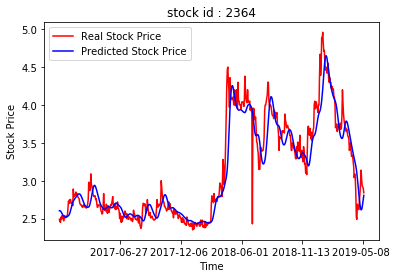

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0243
Epoch 2/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 3/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 4/10
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0050
Epoch 5/10
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0041
Epoch 6/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 7/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 8/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 9/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0031
Epoch 10/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0028
real_stock_price 大小: (573, 1)
(573, 60, 1)


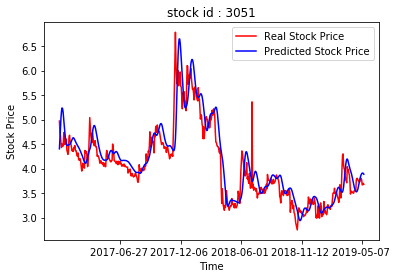

training set 大小: (1164, 1)
(1104, 60)
(1104,)
Epoch 1/10
1104/1104 [==============================] - 6s 5ms/step - loss: 0.0144
Epoch 2/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0054
Epoch 3/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 4/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 5/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0039
Epoch 6/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0039
Epoch 7/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0034
Epoch 8/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 9/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0031
Epoch 10/10
1104/1104 [==============================] - 3s 3ms/step - loss: 0.0031
real_stock_price 大小: (562, 1)
(562, 60, 1)


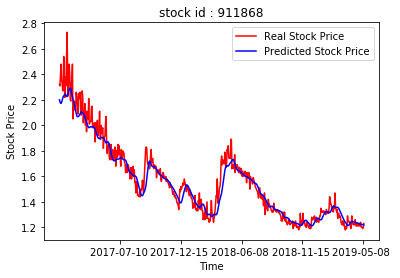

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 7s 6ms/step - loss: 0.0179
Epoch 2/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 3/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0035
Epoch 4/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0031
Epoch 5/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 6/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 8/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 9/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 10/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0024
real_stock_price 大小: (572, 1)
(572, 60, 1)


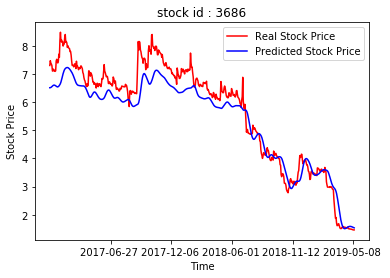

training set 大小: (1223, 1)
(1163, 60)
(1163,)
Epoch 1/10
1163/1163 [==============================] - 7s 6ms/step - loss: 0.0479
Epoch 2/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0085
Epoch 3/10
1163/1163 [==============================] - 4s 3ms/step - loss: 0.0076
Epoch 4/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 5/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 6/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0063
Epoch 7/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 8/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 9/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 10/10
1163/1163 [==============================] - 3s 3ms/step - loss: 0.0049
real_stock_price 大小: (573, 1)
(573, 60, 1)


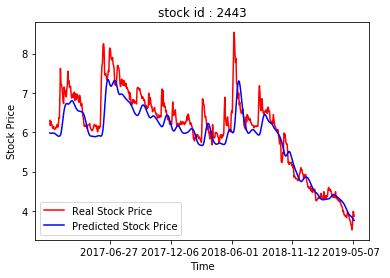

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 7s 6ms/step - loss: 0.0452
Epoch 2/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0085
Epoch 3/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0077
Epoch 4/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 5/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0068
Epoch 6/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0063
Epoch 8/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 9/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 10/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0056
real_stock_price 大小: (566, 1)
(566, 60, 1)


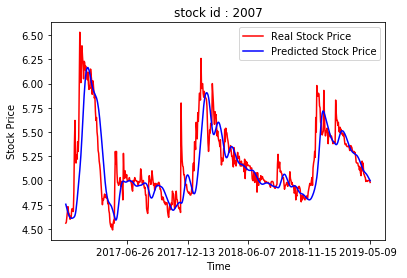

training set 大小: (1228, 1)
(1168, 60)
(1168,)
Epoch 1/10
1168/1168 [==============================] - 7s 6ms/step - loss: 0.0096
Epoch 2/10
1168/1168 [==============================] - 4s 3ms/step - loss: 0.0021
Epoch 3/10
1168/1168 [==============================] - 4s 3ms/step - loss: 0.0019
Epoch 4/10
1168/1168 [==============================] - 3s 3ms/step - loss: 0.0018
Epoch 5/10
1168/1168 [==============================] - 3s 3ms/step - loss: 0.0019
Epoch 6/10
1168/1168 [==============================] - 3s 3ms/step - loss: 0.0019
Epoch 7/10
1168/1168 [==============================] - 3s 3ms/step - loss: 0.0018
Epoch 8/10
1168/1168 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 9/10
1168/1168 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 10/10
1168/1168 [==============================] - 4s 3ms/step - loss: 0.0015
real_stock_price 大小: (561, 1)
(561, 60, 1)


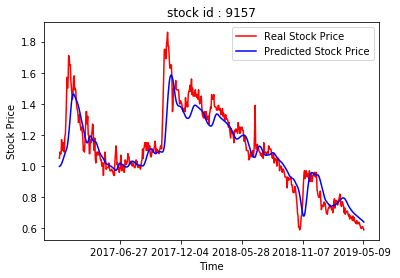

training set 大小: (1174, 1)
(1114, 60)
(1114,)
Epoch 1/10
1114/1114 [==============================] - 8s 7ms/step - loss: 0.0231
Epoch 2/10
1114/1114 [==============================] - 3s 3ms/step - loss: 0.0066
Epoch 3/10
1114/1114 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 4/10
1114/1114 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 5/10
1114/1114 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 6/10
1114/1114 [==============================] - 4s 3ms/step - loss: 0.0052
Epoch 7/10
1114/1114 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 8/10
1114/1114 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 9/10
1114/1114 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 10/10
1114/1114 [==============================] - 3s 3ms/step - loss: 0.0038
real_stock_price 大小: (571, 1)
(571, 60, 1)


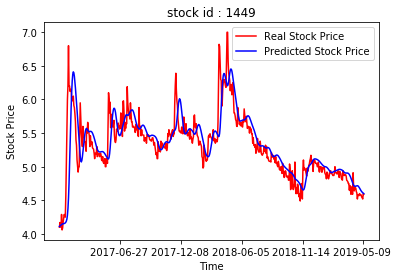

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.0313
Epoch 2/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 3/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 4/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 5/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 6/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 8/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 9/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 10/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0035
real_stock_price 大小: (568, 1)
(568, 60, 1)


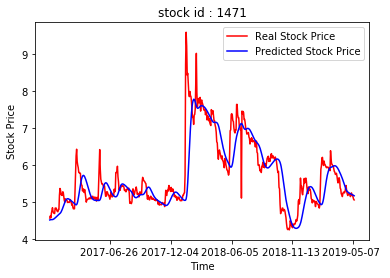

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 9s 8ms/step - loss: 0.0253
Epoch 2/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 3/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0060
Epoch 4/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 5/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0050
Epoch 6/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 8/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 9/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 10/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0046
real_stock_price 大小: (573, 1)
(573, 60, 1)


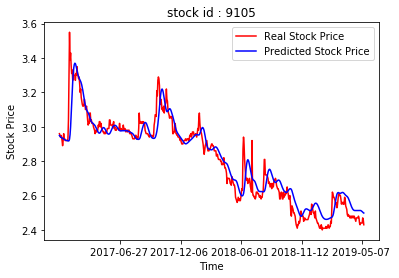

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 9s 8ms/step - loss: 0.0516
Epoch 2/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0083
Epoch 3/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0067
Epoch 4/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0070
Epoch 5/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0062
Epoch 6/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0059
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 8/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0062
Epoch 9/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 10/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0054
real_stock_price 大小: (573, 1)
(573, 60, 1)


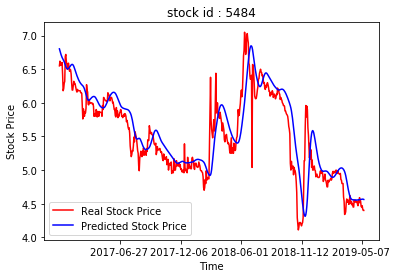

training set 大小: (1171, 1)
(1111, 60)
(1111,)
Epoch 1/10
1111/1111 [==============================] - 10s 9ms/step - loss: 0.0287
Epoch 2/10
1111/1111 [==============================] - 3s 3ms/step - loss: 0.0069
Epoch 3/10
1111/1111 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 4/10
1111/1111 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 5/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 6/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 7/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.0049
Epoch 8/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.0042
Epoch 9/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 10/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.0047
real_stock_price 大小: (355, 1)
(355, 60, 1)


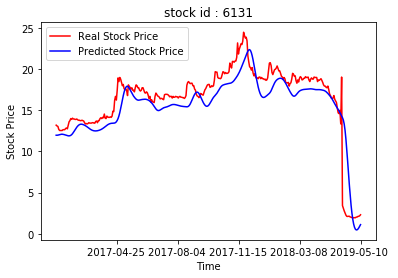

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 11s 9ms/step - loss: 0.0344
Epoch 2/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0092
Epoch 3/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0069
Epoch 4/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0068
Epoch 5/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0068
Epoch 6/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0058
Epoch 7/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0052
Epoch 8/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 9/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 10/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0042
real_stock_price 大小: (573, 1)
(573, 60, 1)


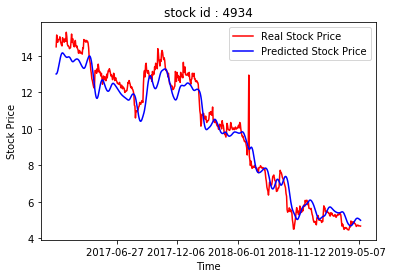

training set 大小: (1200, 1)
(1140, 60)
(1140,)
Epoch 1/10
1140/1140 [==============================] - 11s 9ms/step - loss: 0.0449
Epoch 2/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 3/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 4/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 5/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 6/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 7/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 8/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0032
Epoch 9/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 10/10
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0031
real_stock_price 大小: (485, 1)
(485, 60, 1)


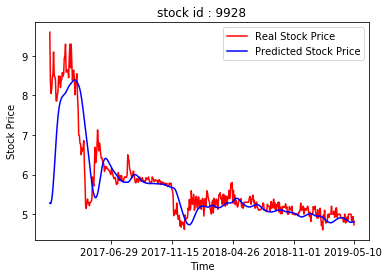

training set 大小: (1213, 1)
(1153, 60)
(1153,)
Epoch 1/10
1153/1153 [==============================] - 11s 10ms/step - loss: 0.0113
Epoch 2/10
1153/1153 [==============================] - 4s 3ms/step - loss: 0.0026
Epoch 3/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0022
Epoch 4/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0018
Epoch 5/10
1153/1153 [==============================] - 5s 4ms/step - loss: 0.0023
Epoch 6/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 7/10
1153/1153 [==============================] - 4s 3ms/step - loss: 0.0018
Epoch 8/10
1153/1153 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 9/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0022
Epoch 10/10
1153/1153 [==============================] - 4s 3ms/step - loss: 0.0018
real_stock_price 大小: (559, 1)
(559, 60, 1)


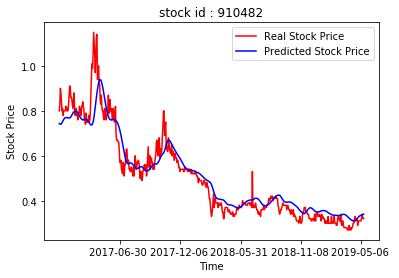

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 12s 10ms/step - loss: 0.0231
Epoch 2/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 3/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 4/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 5/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0056
Epoch 6/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 7/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0038
Epoch 8/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 9/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 10/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.0031
real_stock_price 大小: (573, 1)
(573, 60, 1)


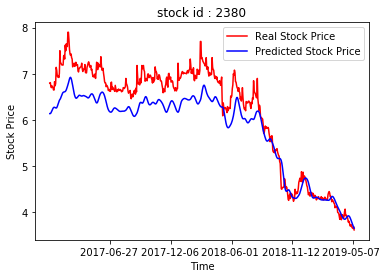

training set 大小: (1153, 1)
(1093, 60)
(1093,)
Epoch 1/10
1093/1093 [==============================] - 12s 11ms/step - loss: 0.0089
Epoch 2/10
1093/1093 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 3/10
1093/1093 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 4/10
1093/1093 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 5/10
1093/1093 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 6/10
1093/1093 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 7/10
1093/1093 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 8/10
1093/1093 [==============================] - 4s 3ms/step - loss: 9.8342e-04
Epoch 9/10
1093/1093 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 10/10
1093/1093 [==============================] - 4s 4ms/step - loss: 0.0011
real_stock_price 大小: (448, 1)
(448, 60, 1)


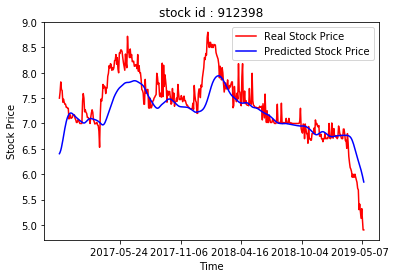

training set 大小: (1154, 1)
(1094, 60)
(1094,)
Epoch 1/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.0115
Epoch 2/10
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 3/10
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 4/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0031
Epoch 5/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0027
Epoch 6/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0026
Epoch 7/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0028
Epoch 8/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0028
Epoch 9/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0023
Epoch 10/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0024
real_stock_price 大小: (478, 1)
(478, 60, 1)


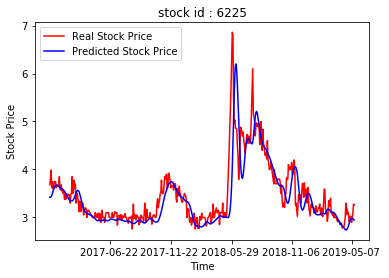

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 13s 11ms/step - loss: 0.0131
Epoch 2/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0026
Epoch 3/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0023
Epoch 4/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0022
Epoch 5/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0025
Epoch 6/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 7/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 8/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0018
Epoch 9/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 10/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0014
real_stock_price 大小: (573, 1)
(573, 60, 1)


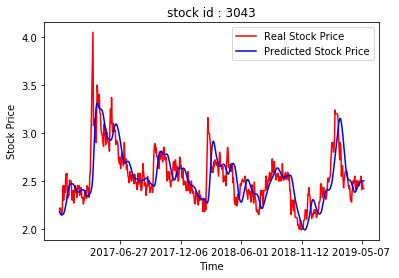

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 14s 12ms/step - loss: 0.0171
Epoch 2/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0023
Epoch 3/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 4/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 5/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 6/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 7/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 8/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0015
Epoch 9/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0015
Epoch 10/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0013
real_stock_price 大小: (573, 1)
(573, 60, 1)


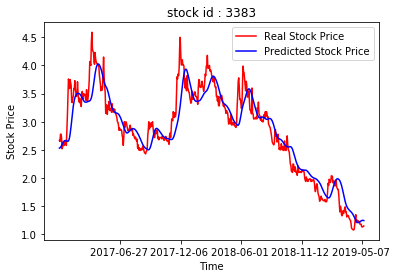

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 15s 13ms/step - loss: 0.0194
Epoch 2/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0072
Epoch 3/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 4/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0056
Epoch 5/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0049
Epoch 6/10
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 7/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 8/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0038
Epoch 9/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0037
Epoch 10/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0039
real_stock_price 大小: (573, 1)
(573, 60, 1)


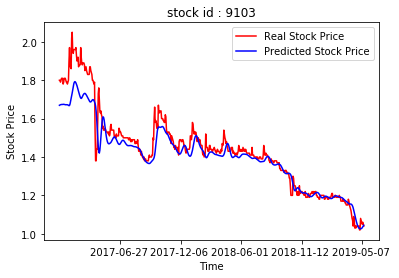

training set 大小: (1217, 1)
(1157, 60)
(1157,)
Epoch 1/10
1157/1157 [==============================] - 15s 13ms/step - loss: 0.0375
Epoch 2/10
1157/1157 [==============================] - 4s 4ms/step - loss: 0.0084
Epoch 3/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0075
Epoch 4/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0067
Epoch 5/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0065
Epoch 6/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 7/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 8/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 9/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 10/10
1157/1157 [==============================] - 5s 4ms/step - loss: 0.0059
real_stock_price 大小: (550, 1)
(550, 60, 1)


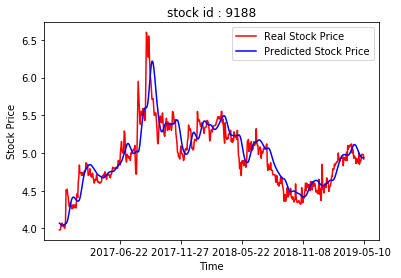

training set 大小: (1215, 1)
(1155, 60)
(1155,)
Epoch 1/10
1155/1155 [==============================] - 16s 14ms/step - loss: 0.0107
Epoch 2/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0028
Epoch 3/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 4/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 5/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 6/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 7/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 8/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 9/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0018
Epoch 10/10
1155/1155 [==============================] - 5s 4ms/step - loss: 0.0015
real_stock_price 大小: (539, 1)
(539, 60, 1)


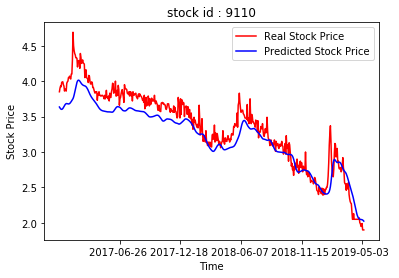

training set 大小: (1198, 1)
(1138, 60)
(1138,)
Epoch 1/10
1138/1138 [==============================] - 17s 15ms/step - loss: 0.0187
Epoch 2/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 3/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 4/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 5/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 6/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 7/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 8/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 9/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0036
Epoch 10/10
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0038
real_stock_price 大小: (492, 1)
(492, 60, 1)


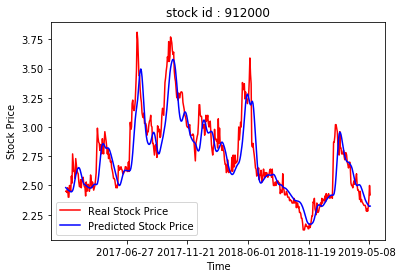

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 18s 15ms/step - loss: 0.0307
Epoch 2/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0084
Epoch 3/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0076
Epoch 4/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0068
Epoch 5/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0063
Epoch 6/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0065
Epoch 7/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0056
Epoch 8/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 9/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0061
Epoch 10/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0048
real_stock_price 大小: (573, 1)
(573, 60, 1)


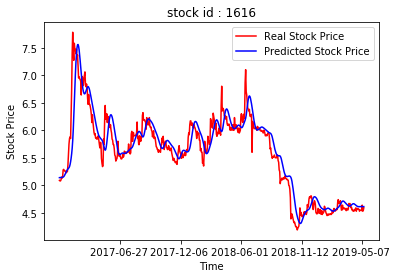

training set 大小: (1231, 1)
(1171, 60)
(1171,)
Epoch 1/10
1171/1171 [==============================] - 19s 16ms/step - loss: 0.0224
Epoch 2/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 3/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 4/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 5/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0035
Epoch 6/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0038
Epoch 7/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 8/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0035
Epoch 9/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 10/10
1171/1171 [==============================] - 5s 4ms/step - loss: 0.0031
real_stock_price 大小: (564, 1)
(564, 60, 1)


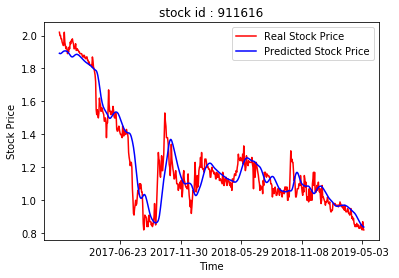

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 19s 16ms/step - loss: 0.0578
Epoch 2/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 3/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 4/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 5/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 6/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 7/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 8/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 9/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 10/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0048
real_stock_price 大小: (573, 1)
(573, 60, 1)


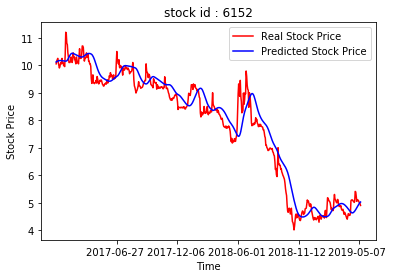

training set 大小: (476, 1)
(416, 60)
(416,)
Epoch 1/10
416/416 [==============================] - 17s 41ms/step - loss: 0.0440
Epoch 2/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0156
Epoch 3/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0122
Epoch 4/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0118
Epoch 5/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0115
Epoch 6/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0119
Epoch 7/10
416/416 [==============================] - 2s 5ms/step - loss: 0.0119
Epoch 8/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0113
Epoch 9/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0112
Epoch 10/10
416/416 [==============================] - 2s 5ms/step - loss: 0.0114
real_stock_price 大小: (150, 1)
(150, 60, 1)


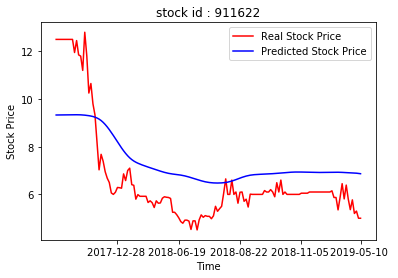

training set 大小: (1219, 1)
(1159, 60)
(1159,)
Epoch 1/10
1159/1159 [==============================] - 22s 19ms/step - loss: 0.0322
Epoch 2/10
1159/1159 [==============================] - 5s 4ms/step - loss: 0.0119
Epoch 3/10
1159/1159 [==============================] - 5s 5ms/step - loss: 0.0120
Epoch 4/10
1159/1159 [==============================] - 5s 4ms/step - loss: 0.0112
Epoch 5/10
1159/1159 [==============================] - 5s 4ms/step - loss: 0.0111
Epoch 6/10
1159/1159 [==============================] - 5s 5ms/step - loss: 0.0094
Epoch 7/10
1159/1159 [==============================] - 5s 5ms/step - loss: 0.0099
Epoch 8/10
1159/1159 [==============================] - 5s 5ms/step - loss: 0.0087
Epoch 9/10
1159/1159 [==============================] - 5s 5ms/step - loss: 0.0083
Epoch 10/10
1159/1159 [==============================] - 5s 5ms/step - loss: 0.0074
real_stock_price 大小: (562, 1)
(562, 60, 1)


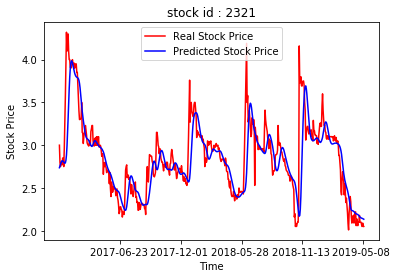

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 23s 20ms/step - loss: 0.0172
Epoch 2/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 3/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0023
Epoch 4/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 5/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0026
Epoch 6/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0025
Epoch 7/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 8/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0021
Epoch 9/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 10/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0017
real_stock_price 大小: (568, 1)
(568, 60, 1)


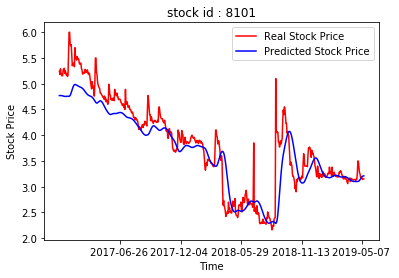

training set 大小: (1137, 1)
(1077, 60)
(1077,)
Epoch 1/10
1077/1077 [==============================] - 23s 21ms/step - loss: 0.0205
Epoch 2/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0059
Epoch 3/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0054
Epoch 4/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0046
Epoch 5/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0042
Epoch 6/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0037
Epoch 7/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0036
Epoch 8/10
1077/1077 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 9/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0027
Epoch 10/10
1077/1077 [==============================] - 5s 5ms/step - loss: 0.0030
real_stock_price 大小: (439, 1)
(439, 60, 1)


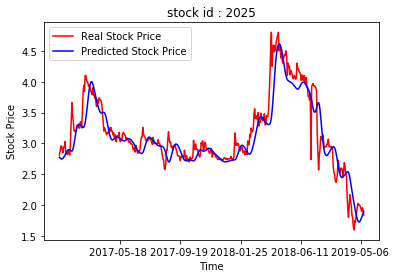

training set 大小: (1232, 1)
(1172, 60)
(1172,)
Epoch 1/10
1172/1172 [==============================] - 27s 23ms/step - loss: 0.0349
Epoch 2/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0086
Epoch 3/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0068
Epoch 4/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0063
Epoch 5/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 6/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 7/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 8/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 9/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 10/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0051
real_stock_price 大小: (572, 1)
(572, 60, 1)


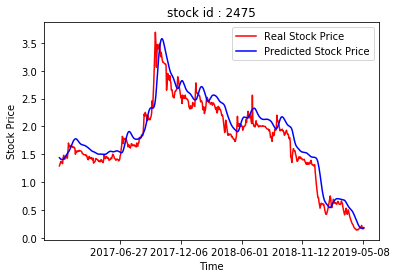

training set 大小: (1230, 1)
(1170, 60)
(1170,)
Epoch 1/10
1170/1170 [==============================] - 24s 21ms/step - loss: 0.0213
Epoch 2/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0038
Epoch 3/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0031
Epoch 4/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0031
Epoch 5/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0032
Epoch 6/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0029
Epoch 7/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0025
Epoch 8/10
1170/1170 [==============================] - 6s 5ms/step - loss: 0.0026
Epoch 9/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0025
Epoch 10/10
1170/1170 [==============================] - 5s 5ms/step - loss: 0.0022
real_stock_price 大小: (572, 1)
(572, 60, 1)


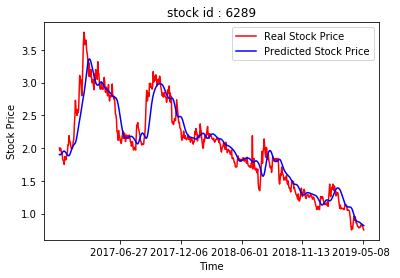

In [17]:
all_stock_growth = []
for i in range(0,len(ALL_stock_id)):#len(ALL_stock_id)
    all_stock_growth.append(seperate_to_analyis_stock(ALL_stock_id[i]))
    #print(all_stock_growth)

# 印出股票的ID 與 的差值 看看股票這60天來的漲幅

In [18]:
print('stock id ',' stock_差值')
all_stock_growth

stock id   stock_差值


[['2364', -1.3515325],
 ['3051', 0.6246469],
 ['911868', -0.12855315],
 ['3686', -2.0524418],
 ['2443', -0.5277307],
 ['2007', -0.41703796],
 ['9157', -0.10197663],
 ['1449', -0.31515074],
 ['1471', 0.20186377],
 ['9105', 0.020944595],
 ['5484', -0.3304448],
 ['6131', -16.512108],
 ['4934', -0.71068096],
 ['9928', -0.14506006],
 ['910482', 0.0014906228],
 ['2380', -0.61178946],
 ['912398', -0.9888487],
 ['6225', -0.11364865],
 ['3043', -0.015236139],
 ['3383', -0.539098],
 ['9103', -0.14113224],
 ['9188', 0.30114746],
 ['9110', -0.4879117],
 ['912000', -0.095752],
 ['1616', 0.07942581],
 ['911616', -0.15661734],
 ['6152', 0.47556448],
 ['911622', 0.1830244],
 ['2321', -0.8810663],
 ['8101', 0.015235662],
 ['2025', -1.1569002],
 ['2475', -0.41937903],
 ['6289', -0.426938]]

# 股票差值排序

In [19]:
price = []
for i in range(0,len(all_stock_growth)):
    price.append(all_stock_growth[i][1])
    
#price

index = np.argsort(-np.array(price))#降序排列
#index

print('你選擇的股票區間中會賺錢:')    
print('stock id ',' stock_差值')
for i in range(0,len(index)):
    if all_stock_growth[index[i]][1]>0:
        print(all_stock_growth[index[i]])

print('你選擇的股票區間中會賺錢的有前五名股票:')    
print('stock id ',' stock_差值')    
for i in range(0,5):
    print(all_stock_growth[index[i]])

你選擇的股票區間中會賺錢:
stock id   stock_差值
['3051', 0.6246469]
['6152', 0.47556448]
['9188', 0.30114746]
['1471', 0.20186377]
['911622', 0.1830244]
['1616', 0.07942581]
['9105', 0.020944595]
['8101', 0.015235662]
['910482', 0.0014906228]
你選擇的股票區間中會賺錢的有前五名股票:
stock id   stock_差值
['3051', 0.6246469]
['6152', 0.47556448]
['9188', 0.30114746]
['1471', 0.20186377]
['911622', 0.1830244]
